In [1]:
input_file = "./241118_1543.mp3"
output_file = input_file.replace(".mp3", ".wav")

In [2]:
"""
import ffmpeg

try:
    stream = ffmpeg.input(input_file)
    stream = ffmpeg.output(stream, output_file)
    ffmpeg.run(stream)
    print("Conversion successful")
except ffmpeg.Error as e:
    print(f"Error: {e.stderr.decode()}")
"""

'\nimport ffmpeg\n\ntry:\n    stream = ffmpeg.input(input_file)\n    stream = ffmpeg.output(stream, output_file)\n    ffmpeg.run(stream)\n    print("Conversion successful")\nexcept ffmpeg.Error as e:\n    print(f"Error: {e.stderr.decode()}")\n'

In [2]:
import os
from huggingface_hub import login

# To save your Huggingface token, run your terminal:
# echo 'export HF_TOKEN="hf_*******************************"' >> $HOME/.bashrc

# Otherwise, the login function will prompt a login interface
login(token=os.environ.get("HF_TOKEN"))

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../.cache/torch/pyannote/models--pyannote--segmentation/snapshots/c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b/pytorch_model.bin`
INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


Model was trained with pyannote.audio 0.0.1, yours is 3.3.2. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.6.0. Bad things might happen unless you revert torch to 1.x.


INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model, mean_var_norm_emb, classifier, label_encoder
INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


Using mps


INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model, mean_var_norm_emb, classifier, label_encoder


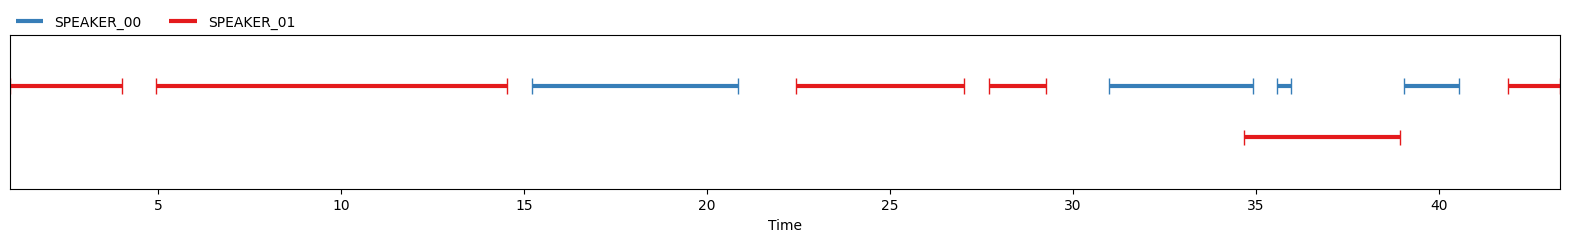

In [ ]:
from pyannote.audio import Pipeline
import torch
import whisper
import pandas as pd

# Initialize Pyannote pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization")

# Load audio file
audio_file = output_file

# Check if MPS is available and set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

# Send pipeline to the appropriate device
pipeline.to(device)

# Perform diarization
who_speaks_when = pipeline(audio_file)

"""
# Load Whisper model and transcribe audio
model = whisper.load_model("base.en")
result = model.transcribe(audio_file)

# Process who_speaks_when and transcription results
transcript = {}
assigned_sections = set()  # To track assigned sections

def calculate_overlap(start1, end1, start2, end2):
    #Calculate the overlap between two time intervals.
    overlap_start = max(start1, start2)
    overlap_end = min(end1, end2)
    return max(0, overlap_end - overlap_start)

# Store overlaps for each section
for segment, _, speaker in diarization.itertracks(yield_label=True):
    segment_duration = segment.end - segment.start
    if speaker not in transcript:
        transcript[speaker] = []

    for section in result["segments"]:
        overlap = calculate_overlap(segment.start, segment.end, section["start"], section["end"])
        overlap_fraction = overlap / (section["end"] - section["start"])

        # Store overlap details
        section.setdefault("overlaps", [])
        section["overlaps"].append((speaker, overlap, overlap_fraction))

# Assign text based on overlap conditions
for section in result["segments"]:
    if "overlaps" in section and section["id"] not in assigned_sections:
        overlaps = sorted(section["overlaps"], key=lambda x: x[1], reverse=True)  # Sort by overlap amount
        max_overlap = overlaps[0]

        if max_overlap[2] > 0.5:
            # Assign to the segment with >50% overlap
            speaker = max_overlap[0]
            transcript[speaker].append((section["start"], section["end"], section["text"]))
            assigned_sections.add(section["id"])
        elif len(overlaps) > 1:
            # Assign to the segment with the most overlap if all are <50%
            speaker = max_overlap[0]
            transcript[speaker].append((section["start"], section["end"], section["text"]))
            assigned_sections.add(section["id"])

# Create DataFrame
df = pd.DataFrame([(speaker, start, end, text) 
                   for speaker, segments in transcript.items() 
                   for start, end, text in segments],
                  columns=["Speaker", "Start", "End", "Text"])

# Sort by start time and save to CSV
df.sort_values(by="Start").reset_index(drop=True).to_csv("transcription_results.csv", index=False)

print("Transcription results saved to 'transcription_results.csv'")
"""

diarization


In [ ]:
# SLOWER () pipeline using https://github.com/yinruiqing/pyannote-whisper
"""
from pyannote.audio import Pipeline
import torch
import utils # CREDIT: https://github.com/yinruiqing/pyannote-whisper
import whisper
import pandas as pd

# Initialize Pyannote pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization")

# Load audio file
audio_file = output_file

model = whisper.load_model("base.en")
asr_result = model.transcribe(audio_file)
diarization_result = pipeline(audio_file)
final_result = utils.diarize_text(asr_result, diarization_result)

for seg, spk, sent in final_result:
    line = f'{seg.start:.2f} {seg.end:.2f} {spk} {sent}'
    print(line)
"""

INFO:speechbrain.utils.quirks:Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
INFO:speechbrain.utils.quirks:Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../.cache/torch/pyannote/models--pyannote--segmentation/snapshots/c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b/pytorch_model.bin`
INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


Model was trained with pyannote.audio 0.0.1, yours is 3.3.2. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.6.0. Bad things might happen unless you revert torch to 1.x.


/Users/nmassari/ghe_local/venv_transcribe/lib/python3.13/site-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model, mean_var_norm_emb, classifier, label_enco

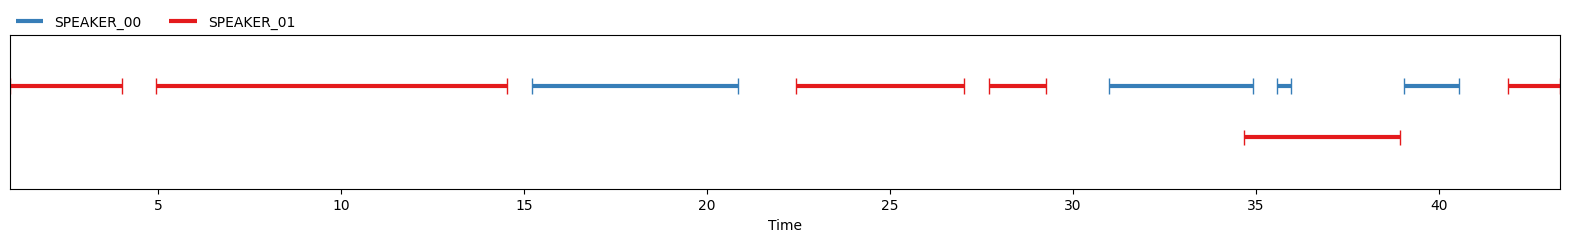

In [4]:
# From https://gist.github.com/hbredin/049f2b629700bcea71324d2c1e7f8337
from pyannote.audio import Pipeline
import torch

# Check if MPS is available and set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")

# load pyannote.audio speaker diarization 
from pyannote.audio import Pipeline
speaker_diarization = Pipeline.from_pretrained("pyannote/speaker-diarization@2.1", 
                                               use_auth_token=True).to(device)
     
# Load audio file
audio_file = output_file

# apply speaker diarization
who_speaks_when = speaker_diarization(audio_file, 
                                      num_speakers=None,  # these values can be
                                      min_speakers=None,  # provided by the user
                                      max_speakers=None)  # when they are known
     

# reset notebook visualization (including start time, end time and speaker colors)
from pyannote.core import notebook
notebook.reset()

who_speaks_when

In [ ]:
"""
# load OpenAI Whisper automatic speech transcription 
import whisper
# choose among "tiny", "base", "small", "medium", "large"
# see https://github.com/openai/whisper/
model = whisper.load_model("small") 
text = model.transcribe(audio_file)
"""

/Users/nmassari/ghe_local/venv_transcribe/lib/python3.13/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [ ]:
"""
# load OpenAI Whisper automatic speech transcription 
import whisper

# choose among "tiny", "base", "small", "medium", "large"
# see https://github.com/openai/whisper/
model = whisper.load_model("small") 
     

# transcribing first minute
from pyannote.core import Segment
first_minute = Segment(0, 60)

from pyannote.audio import Audio
audio = Audio(sample_rate=16000, mono=True)

import torch

for segment, _, speaker in who_speaks_when.crop(first_minute).itertracks(yield_label=True):
    waveform, sample_rate = audio.crop(audio_file, segment)
    print(waveform.shape)
    waveform_tensor = torch.from_numpy(waveform.squeeze().numpy())
    text = model.transcribe(waveform_tensor)["text"]
    print(f"{segment.start:06.1f}s {segment.end:06.1f}s {speaker}: {text}")"
    """"

torch.Size([2, 48870])


/Users/nmassari/ghe_local/venv_transcribe/lib/python3.13/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


AttributeError: 'list' object has no attribute 'get'

In [5]:
import whisper
from pyannote.core import Segment
from pyannote.audio import Audio

# Load the Whisper model
model = whisper.load_model("small")

# Transcribing first minute
first_minute = Segment(0, 60)
audio = Audio(sample_rate=16000, mono=True)

for segment, _, speaker in who_speaks_when.crop(first_minute).itertracks(yield_label=True):
    waveform, sample_rate = audio.crop(audio_file, segment)
    
    # Convert to mono by averaging the two channels
    if waveform.shape[0] == 2:  # Check if it's stereo
        waveform = waveform.mean(dim=0, keepdim=True)  # Average the two channels
    
    # Ensure waveform is a 1D tensor
    waveform_tensor = waveform.squeeze()  # Remove any extra dimensions
    
    # Transcribe
    text = model.transcribe(waveform_tensor.numpy())["text"]  # Convert to numpy array
    print(f"{segment.start:06.1f}s {segment.end:06.1f}s {speaker}: {text}")


/Users/nmassari/ghe_local/venv_transcribe/lib/python3.13/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


0001.0s 0004.0s SPEAKER_01:  So welcome to this interview today. I'm sitting here with Natalie.
0005.0s 0014.5s SPEAKER_01:  And we're going to have just a little interview with two questions. My name is Lars and I'm handing over to my interview to introduce yourself.
0015.2s 0020.9s SPEAKER_00:  Thank you. My name is Natalie. I'm an employee at GIG and we are testing this new device.
0022.4s 0027.0s SPEAKER_01:  Okay, thank you. My first question to you is...
0027.7s 0029.3s SPEAKER_01:  When is your next field trip?
0031.0s 0034.9s SPEAKER_00:  I am not sure. We are hoping for me.
0034.7s 0038.9s SPEAKER_01:  Okay, you're hoping for me. I think I'm bad. When was your last field trip?
0035.6s 0036.0s SPEAKER_00:  Bye.
0039.0s 0040.5s SPEAKER_00:  I lost my angel lot.
0041.9s 0043.3s SPEAKER_01:  Okay, thank you very much for the interview.


In [19]:
"""
import utils 

text = utils.diarize_text(transcribed, who_speaks_when)

for seg, spk, sent in text:
    line = f'{seg.start:.2f} {seg.end:.2f} {spk} {sent}'
    print(line)
"""

"\nimport utils \n\ntext = utils.diarize_text(transcribed, who_speaks_when)\n\nfor seg, spk, sent in text:\n    line = f'{seg.start:.2f} {seg.end:.2f} {spk} {sent}'\n    print(line)\n"

In [20]:
# Process diarization and transcription results
transcript = {}
assigned_sections = set()  # To track assigned sections

def calculate_overlap(start1, end1, start2, end2):
    #Calculate the overlap between two time intervals.
    overlap_start = max(start1, start2)
    overlap_end = min(end1, end2)
    return max(0, overlap_end - overlap_start)

# Store overlaps for each section
for segment, _, speaker in who_speaks_when.itertracks(yield_label=True):
    segment_duration = segment.end - segment.start
    if speaker not in transcript:
        transcript[speaker] = []

    for section in text["segments"]:
        overlap = calculate_overlap(segment.start, segment.end, section["start"], section["end"])
        overlap_fraction = overlap / (section["end"] - section["start"])

        # Store overlap details
        section.setdefault("overlaps", [])
        section["overlaps"].append((speaker, overlap, overlap_fraction))

# Assign text based on overlap conditions
for section in text["segments"]:
    if "overlaps" in section and section["id"] not in assigned_sections:
        overlaps = sorted(section["overlaps"], key=lambda x: x[1], reverse=True)  # Sort by overlap amount
        max_overlap = overlaps[0]

        if max_overlap[2] > 0.5:
            # Assign to the segment with >50% overlap
            speaker = max_overlap[0]
            transcript[speaker].append((section["start"], section["end"], section["text"]))
            assigned_sections.add(section["id"])
        elif len(overlaps) > 1:
            # Assign to the segment with the most overlap if all are <50%
            speaker = max_overlap[0]
            transcript[speaker].append((section["start"], section["end"], section["text"]))
            assigned_sections.add(section["id"])

# Create DataFrame
df = pd.DataFrame([(speaker, start, end, text) 
                   for speaker, segments in transcript.items() 
                   for start, end, text in segments],
                  columns=["Speaker", "Start", "End", "Text"])

# Sort by start time and save to CSV
df.sort_values(by="Start").reset_index(drop=True).to_csv("transcription_results.csv", index=False)